In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import util.trading_systems as ts
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-2])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items

C:\Users\Martin\Projects\OSRS_Research
['C:\\Users\\Martin\\Projects\\OSRS_Research\\ML\\OSRS', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\python37.zip', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\DLLs', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37', '', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Martin\\.ipython', 'C:\\Users\\Martin\\Projects\\OSRS_Research']


In [2]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
item = "Trident_of_the_seas_(full)"

In [4]:
similar = items.getSimilarItems(item)
print(similar)
similar = [a[0] for a in similar]
similar = similar[:]
print(similar)

[('Trident_of_the_swamp_(e)', 22), ('Trident_of_the_seas_(e)', 26), ('Amulet_of_the_damned_(full)', 20), ('Trident_of_the_seas', 27), ('Trident_of_the_swamp', 22)]
['Trident_of_the_swamp_(e)', 'Trident_of_the_seas_(e)', 'Amulet_of_the_damned_(full)', 'Trident_of_the_seas', 'Trident_of_the_swamp']


In [5]:
items.getPrices(item)[-10:]

[981324,
 987448,
 994744,
 996892,
 993170,
 990757,
 995636,
 989139,
 991784,
 993160]

In [6]:
items.getInfo(item)

{'name': 'Trident_of_the_seas_(full)',
 'image': '/w/File:Trident_of_the_seas.png',
 'released': '30 January 2014',
 'update': '/w/Update:Release_the_Kraken!',
 'members': 'True',
 'quest': 'No',
 'tradeable': 'True',
 'equipable': 'True',
 'stackable': 'False',
 'edible': 'False',
 'noteable': 'True',
 'destroy': 'Drop',
 'storeprice': 'N/A',
 'storeCurrency': 'N/A',
 'seller': 'N/A',
 'alchable': 'True',
 'highAlch': '41400',
 'lowAlch': '27600',
 'exchangePrice': '1010603',
 'buyLimit': '8',
 'weight': '1.0',
 'examine': 'A weapon from the deep.'}

1431 0


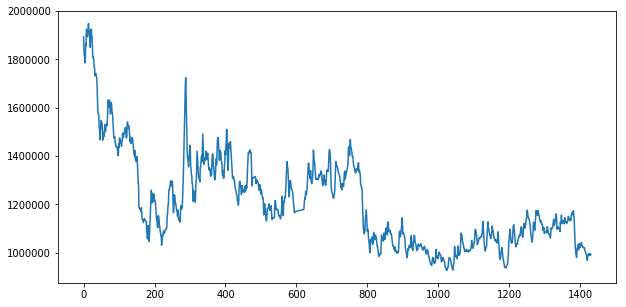

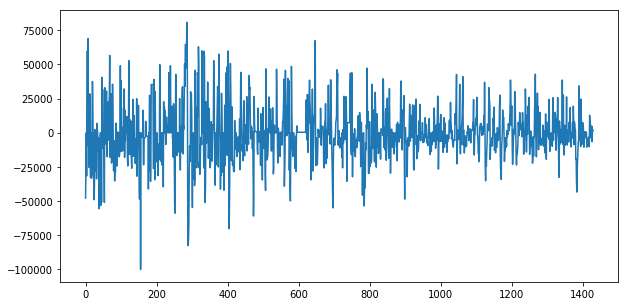

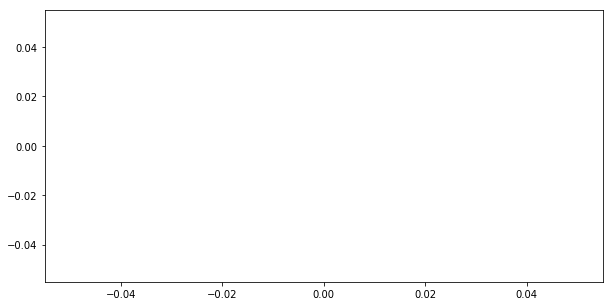

In [7]:
ma = 21
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
quant = items.getQuants(item)
print(len(prices),len(quant))
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices,label='Price')
plt.show()
plt.plot(changes)
plt.show()
plt.plot(quant)
plt.show()

1420 1420


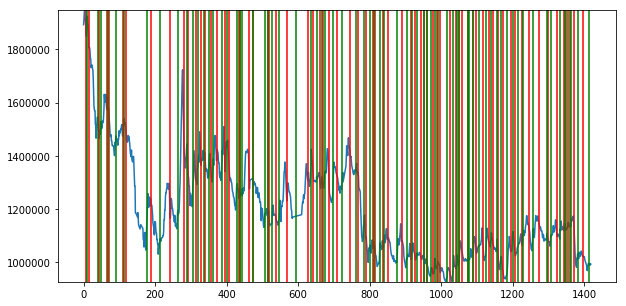

In [8]:
ma12 = items.sma(prices,12)
ma3 = items.sma(prices,3)[-1*len(ma12):]
print(len(ma3),len(ma12))

smaSell = []
smaBuy = []
for i in range(1,len(ma12)):
    if ma3[i-1]>ma12[i-1] and ma3[i]<ma12[i]:
        smaSell.append(i)
    if ma3[i-1]<ma12[i-1] and ma3[i]>ma12[i]:
        smaBuy.append(i)
        
smaSignals = [0]*len(ma12)
for a in smaSell:
    smaSignals[a] = -1
for a in smaBuy:
    smaSignals[a] = 1
        
plt.plot(prices[-1*len(ma12):])
top = max(prices)+1
for c in smaSell:
    plt.plot([c,c],[0,top],'r')
for c in smaBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

171 99


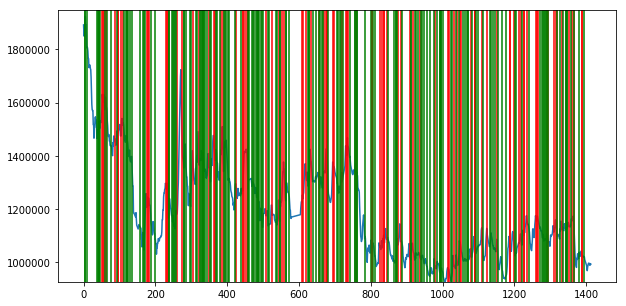

In [9]:
kSlow, D = items.stochOscil(prices)
kSlow = kSlow[-1*len(D):]
    
stochSell = []
stochBuy = []
for i in range(1,len(D)):
    if kSlow[i]<20 and kSlow[i-1]>20:
        stochBuy.append(i)
    elif kSlow[i]<80 and D[i]<80 and kSlow[i-1]<D[i-1] and kSlow[i]>D[i]:
        stochBuy.append(i)
    if kSlow[i-1]>kSlow[i] and kSlow[i-1]>90:
        stochSell.append(i)
print(len(stochBuy),len(stochSell))        
stochSignals = [0]*len(D)
for a in stochSell:
    stochSignals[a] = -1
for a in stochBuy:
    stochSignals[a] = 1
        
plt.plot(prices[-1*len(D):])
top = max(prices)+1
for c in stochSell:
    plt.plot([c,c],[0,top],'r')
for c in stochBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

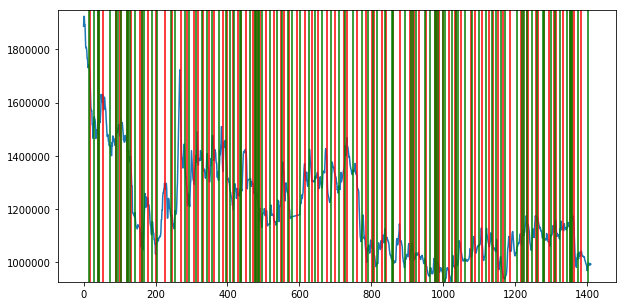

In [10]:
mom, momMA = items.momentum(prices)
mom = mom[-1*len(momMA):]

momSell = []
momBuy = []
for i in range(1,len(momMA)):
    if mom[i-1]>momMA[i-1] and mom[i]<momMA[i]:
        momSell.append(i)
    if mom[i-1]<momMA[i-1] and mom[i]>momMA[i]:
        momBuy.append(i)

momSignals = [0]*len(momMA)
for a in momSell:
    momSignals[a] = -1
for a in momBuy:
    momSignals[a] = 1
        
plt.plot(prices[-1*len(momMA):])
top = max(prices)+1
for c in momSell:
    plt.plot([c,c],[0,top],'r')
for c in momBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

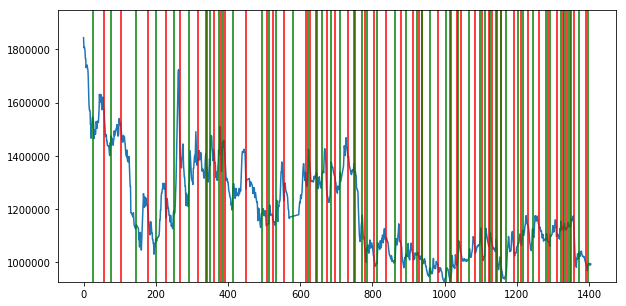

In [11]:
ema9, macd = items.macd(prices)
ema9 = ema9[-1*len(macd):]

macdSell = []
macdBuy = []
for i in range(1,len(macd)):
    if ema9[i-1]>macd[i-1] and ema9[i]<macd[i]:
        macdSell.append(i)
    if ema9[i-1]<macd[i-1] and ema9[i]>macd[i]:
        macdBuy.append(i)
        
macdSignals = [0]*len(macd)
for a in macdSell:
    macdSignals[a] = -1
for a in macdBuy:
    macdSignals[a] = 1
        
plt.plot(prices[-1*len(macd):])
top = max(prices)+1
for c in macdSell:
    plt.plot([c,c],[0,top],'r')
for c in macdBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

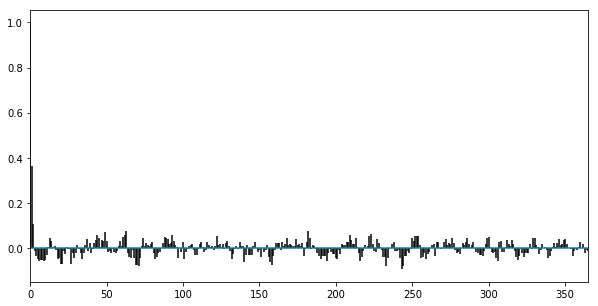

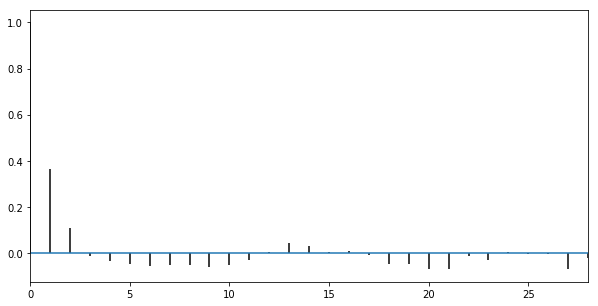

In [12]:
plt.acorr(changes,maxlags=365)
plt.xlim(0,365)
plt.show()
plt.acorr(changes,maxlags=28)
plt.xlim(0,28)
plt.show()

In [13]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0

In [14]:
momEMA = items.ema(momSignals,3)
smaEMA = items.ema(smaSignals,3)
stochEMA = items.ema(stochSignals,3)
macdEMA = items.ema(macdSignals,3)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

features = [changes,momSignals,smaSignals,stochSignals,macdSignals]
#features = [momEMA,smaEMA,stochEMA,macdEMA]
#features = [changes]
#features = [smaSignals,momSignals,stochSignals,macdSignals]
#features = [ma3,ma12,ema9,macd,mom,momMA,kSlow,D]

fsizes = [7,3,3,3,3]

x = []
y = []
p = []
size = sum(fsizes)

fsMax = max(fsizes)

fMin = len(features[0])
for f in features:
    if len(f)<fMin:
        fMin=len(f)
        
for i in range(len(features)):
    features[i] = features[i][-1*fMin:]

s1 = int(len(features[0])*.8)
s2  =int(len(features[0])*.9)
for i in range(len(features)):
    features[i][:s2] = list(scaler.fit_transform(np.array(features[i][:s2]).reshape(-1, 1)).reshape(len(features[i][:s2]),))
    features[i][s2:] = list(scaler.fit_transform(np.array(features[i][s2:]).reshape(-1, 1)).reshape(len(features[i][s2:]),))
        
for i in range(-1*fMin+fsMax,0,1):
    xelem = []
    for j in range(len(features)):
        #print(type(xelem),type(features[j][i-fsizes[j]:i]))
        xelem = xelem + list(features[j][i-fsizes[j]:i])
    x.append(xelem)
    y.append(classify(changes[i]))
    p.append(prices[i])
print(x[0],x[-1])
print(len(x[0]),len(x[-1]))
print(y[0],y[-1])
#y = keras.utils.to_categorical(y, num_classes=2)

[-0.4359680711594949, -0.3150677353866919, 0.13262195965194684, 0.08231688765716873, -0.0363375871930611, -0.20312871659558462, 0.10624692300458571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.23661776005268745, 0.11104606490797997, -0.03213688973448951, -0.00020733477248056215, 0.17766150768968086, -0.09982559486785456, 0.12316905101655021, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
19 19
0 1


c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\loca

1124 1124 141 141 134 134 134
19 [-0.43596807 -0.31506774  0.13262196  0.08231689 -0.03633759 -0.20312872
  0.10624692  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
0
19 [-0.0721647  -0.17627115  0.0998012   0.04374764 -0.22012855 -0.30064762
  0.03699096  0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.        ]
1


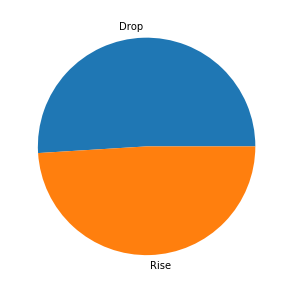

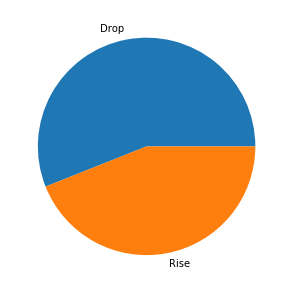

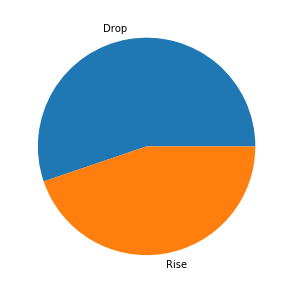

In [16]:
#scaler.fit_transform(np.array(changes).reshape(-1, 1)).reshape(len(changes),)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

x_train = np.array(x[:s1])
y_train = np.array(y[:s1])

x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
p_val = np.array(p[s1:s2])

x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])

print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.pie([list(y_train).count(0)/len(y_train),list(y_train).count(1)/len(y_train)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_val).count(0)/len(y_val),list(y_val).count(1)/len(y_val)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_test).count(0)/len(y_test),list(y_test).count(1)/len(y_test)],labels=['Drop','Rise'])
plt.show()

In [17]:
model = Sequential()
model.add(Dense(int(size), input_dim=size, activation='sigmoid'))
model.add(Dense(int(size), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 20        
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=100,
            batch_size=8)

Train on 1124 samples, validate on 141 samples
Epoch 1/100
1124/1124 [==============================] - 1s 507us/step - loss: 0.6500 - acc: 0.6228 - val_loss: 0.6046 - val_acc: 0.7376
Epoch 2/100
1124/1124 [==============================] - 0s 142us/step - loss: 0.6485 - acc: 0.6263 - val_loss: 0.6034 - val_acc: 0.7092
Epoch 3/100
1124/1124 [==============================] - 0s 141us/step - loss: 0.6498 - acc: 0.6174 - val_loss: 0.6012 - val_acc: 0.7163
Epoch 4/100
1124/1124 [==============================] - 0s 142us/step - loss: 0.6483 - acc: 0.6263 - val_loss: 0.6018 - val_acc: 0.7163
Epoch 5/100
1124/1124 [==============================] - 0s 144us/step - loss: 0.6479 - acc: 0.6308 - val_loss: 0.6065 - val_acc: 0.7518
Epoch 6/100
1124/1124 [==============================] - 0s 148us/step - loss: 0.6484 - acc: 0.6192 - val_loss: 0.6021 - val_acc: 0.7163
Epoch 7/100
1124/1124 [==============================] - 0s 145us/step - loss: 0.6478 - acc: 0.6388 - val_loss: 0.6059 - val_acc: 0

1124/1124 [==============================] - 0s 141us/step - loss: 0.6438 - acc: 0.6308 - val_loss: 0.5962 - val_acc: 0.7021
Epoch 61/100
1124/1124 [==============================] - 0s 141us/step - loss: 0.6448 - acc: 0.6237 - val_loss: 0.6026 - val_acc: 0.7589
Epoch 62/100
1124/1124 [==============================] - 0s 141us/step - loss: 0.6441 - acc: 0.6335 - val_loss: 0.6028 - val_acc: 0.7447
Epoch 63/100
1124/1124 [==============================] - 0s 139us/step - loss: 0.6434 - acc: 0.6352 - val_loss: 0.5952 - val_acc: 0.6879
Epoch 64/100
1124/1124 [==============================] - 0s 140us/step - loss: 0.6434 - acc: 0.6299 - val_loss: 0.5985 - val_acc: 0.6879
Epoch 65/100
1124/1124 [==============================] - 0s 140us/step - loss: 0.6433 - acc: 0.6335 - val_loss: 0.6041 - val_acc: 0.7447
Epoch 66/100
1124/1124 [==============================] - 0s 140us/step - loss: 0.6429 - acc: 0.6388 - val_loss: 0.5969 - val_acc: 0.6879
Epoch 67/100
1124/1124 [=======================

In [19]:
score = model.evaluate(x_test, y_test, batch_size=1)
print(model.metrics_names)
print(score)

y_pred = model.predict(x_test)
true_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]>.5])
false_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]<.5])
true_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]<.5])
false_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]>.5])
print(true_pos,false_pos,true_neg,false_neg,true_pos+true_neg+false_pos+false_neg)
print('Accuracy: ', (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
prec = (true_pos)/(true_pos+false_pos)
print('Precision: ', prec)
recall = (true_pos)/(true_pos+false_neg)
print('Recall: ', recall)
print('F1: ', (2*recall*prec)/(recall+prec))

134/134 [==============================] - 0s 373us/step
['loss', 'acc']
[0.7469155445917329, 0.5671641791044776]
27 25 49 33 134
Accuracy:  0.5671641791044776
Precision:  0.5192307692307693
Recall:  0.45
F1:  0.48214285714285715


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


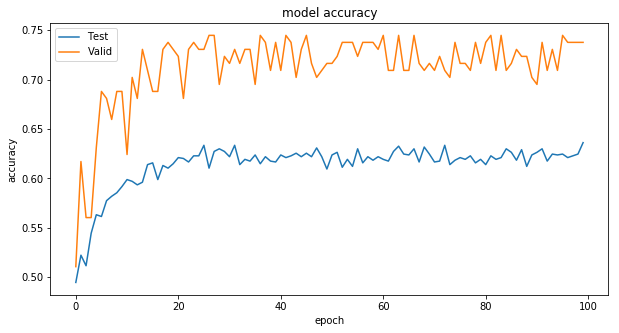

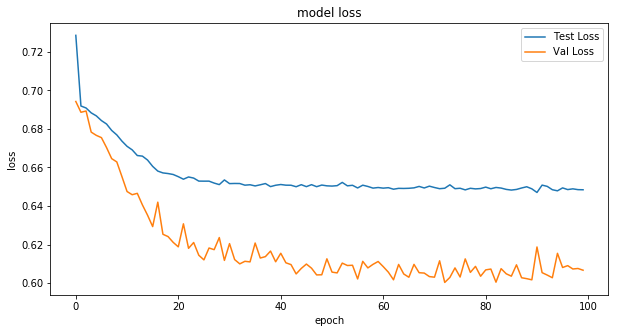

In [20]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [21]:
print(y_test[:20])
print(p_test[:20])

[1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0]
[1105260. 1098865. 1079521. 1087413. 1084539. 1083459. 1084426. 1087349.
 1088106. 1083573. 1108014. 1105383. 1091852. 1087403. 1077715. 1077530.
 1077345. 1073784. 1070223. 1060353.]


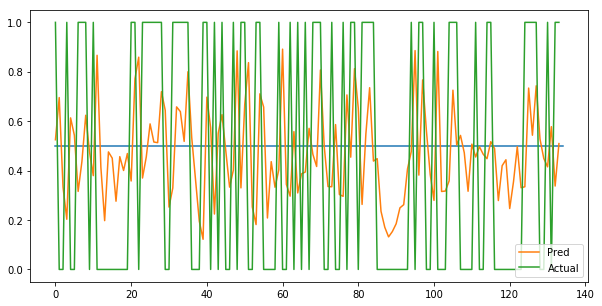

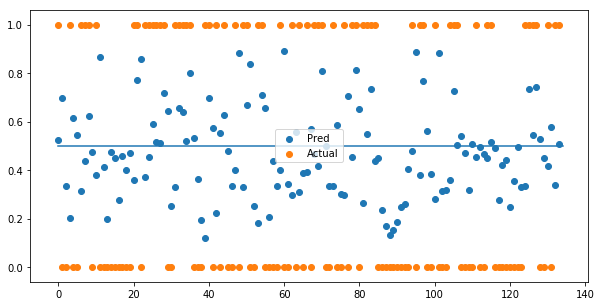

In [22]:
y_pred = model.predict(x_test)
plt.plot([0, len(y_pred)], [.5, .5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot([0, len(y_test)], [.5, .5])
plt.scatter(range(len(y_test)),y_pred,label='Pred')
plt.scatter(range(len(y_test)),y_test,label='Actual')
#plt.plot(y_test[-31:],label='Actual-1')
plt.legend()
plt.show()

In [23]:
bl = int(items.getInfo(item)['buyLimit'])
budget = bl*p_test[0]+1
print(bl,budget)

8 8842081.0


In [30]:
y_pred = [classify(a) for a in model.predict(x_test)]
perf = ts.perfectProfit(p_test,bl,budget)
bAH = ts.buyAndHold(p_test,bl,budget)
mod = ts.modelProfit(0,y_pred,p_test,bl,budget)
pers = ts.persistanceProfit(p_test,bl,budget)
momPr = ts.modelProfit(0,momSignals,p_test,bl,budget)

In [31]:
print('Profits')
print('Perfect:\t',perf[-1]*100)
print('Buy & Hold:\t',bAH[-1]*100)
print('Model:\t\t',mod[-1]*100)
print('Persistence:\t',pers[-1]*100)
print('Crossover:\t',momPr[-1]*100)

Profits
Perfect:	 49.463271146238085
Buy & Hold:	 -10.142408783633625
Model:		 -10.266904363350664
Persistence:	 3.332354679854211
Crossover:	 -0.2812799385122122


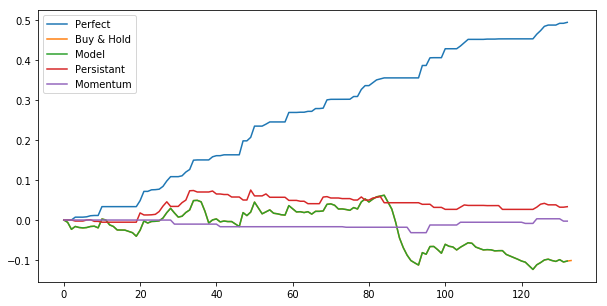

In [33]:
plt.plot(perf,label='Perfect')
plt.plot(bAH,label='Buy & Hold')
plt.plot(mod,label='Model')
plt.plot(pers,label='Persistant')
plt.plot(momPr,label='Momentum')
plt.legend()
plt.show()